<h1 style = "color:brown" align = "center"> Heart Disease Prediction </h1>

<img src="images/heart.jpg" alt="Drawing" style="width: 1030px;"/>

# Concept study

The goal of this project is to use some parameters of patient to determine if they are at risk of heart disease or not, using a machine learninng model, and deploy this model to the cloud building an application that can be useful for disease diagnosis in hospitals.

<h3>Heart Disease Prediction Dataset</h3>

<p>This dataset is a combination of five publicly available heart disease datasets, with a total of $2181$  records:</p>

<ul>
    <li>Heart Attack Analysis & Prediction Dataset: 304 reccords from Rahman, 2021</li>
    <li>Heart Disease Dataset: 1,026 records from Lapp, 2019</li>
    <li>Heart Attack Prediction (Dataset 3): 295 records from Damarla, 2020</li>
    <li>Heart Attack Prediction (Dataset 4): 271 records from Anand, 2018</li>
    <li>Heart CSV Dataset: 290 records from Nandal, 2022</li>
</ul>
<p>Merging these datasets provides a more robust foundation for training machine learning models aimed at early detection and prevention of heart disease. The resulting dataset includes 14 features that are crucial for predicting heart attack and stroke risks, covering both medical and demographic factors. 
</p>

<h3>Features Description:</h3>
<ul>
    <li><strong>age</strong>: age of the patient 
        [years: Numeric]</li>
    <li><strong>sex</strong>: gender of the patient 
        [1: Male, 0: Female]</li>
    <li><strong>cp</strong>: chest pain type 
        [0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic]</li>
    <li><strong>trestbps</strong>: resting blood pressure 
        [mm Hg: Numeric]</li>
    <li><strong>chol</strong>: serum cholesterol level 
        [mg/dl: Numeric]</li>
    <li><strong>fbs</strong>: fasting blood sugar 
        [1: if fasting blood sugar > 120 mg/dl, 0: otherwise]</li>
    <li><strong>restecg</strong>: resting electrocardiographic results 
        [0: Normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria]</li>
    <li><strong>thalach</strong>: maximum heart rate achieved 
        [Numeric value between 60 and 202]</li>
    <li><strong>exang</strong>: exercise-induced angina 
        [1: Yes, 0: No]</li>
    <li><strong>oldpeak</strong>: ST depression induced by exercise relative to rest 
        [Numeric value measured in depression]</li>
    <li><strong>slope</strong>: slope of the peak exercise ST segment 
        [0: Upsloping, 1: Flat, 2: Downsloping]</li>
    <li><strong>ca</strong>: number (0-3) of major vessels (arteries, veins, and capillaries) colored by fluoroscopy 
        [0, 1, 2, 3] </li>
    <li><strong>thal</strong>: Thalassemia types 
        [1: Normal, 2: Fixed defect, 3: Reversible defect]</li>
    <li><strong>target</strong>: outcome variable for heart attack risk 
        [1: disease or more chance of heart attack, 0: normal or less chance of heart attack]</li>
</ul>

Data from: https://www.kaggle.com/datasets/mfarhaannazirkhan/heart-dataset/data

# Necessary setup

Note that this project has been realised under `python 3.11` as recommended for the **2024 ML Zoomcamp**.

## Install

Let's install `kaggle` to be able to download datasets from Kaggle.

In [1]:
# install kaggle library
!pip install kaggle
!pip install xgboost

To use the command line interface, `'Kaggle CLI tool'`, we had to set up our **API keys**. 

For this, we went to the `'Account'` tab of our user profile on Kaggle, and selected `'Create New Token'`. This triggered the download of `kaggle.json`, a file containing our *API credentials*. We then made sure that the token was saved at *~/.kaggle/kaggle.json*, as we are working on `Ubuntu` (WSL distribution). It is the same address to verify for Linux, OSX, and other UNIX-based operating systems. For Windows, check *C:\Users\<Windows-username>\.kaggle\kaggle.json* instead. If the token is not there, an error will be raised. Hence, once downloaded the token, it should be moved to this folder.

## Import

In [2]:
# necessary import
import pickle # to manipulate models
import zipfile # to manipulate .zip file
import xgboost as xgb # for gradient boosting classifier
import numpy as np # for matrices and numerical manipulations
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plots
import seaborn as sns # for visualizing data

from sklearn.metrics import mutual_info_score # for feature importance
from sklearn.feature_extraction import DictVectorizer # for One-Hot Encoding
from sklearn.model_selection import train_test_split, KFold # for cross-validation techniques
from sklearn.linear_model import LogisticRegression # for logistic regression model
from sklearn.tree import DecisionTreeClassifier # for decision trees
from sklearn.ensemble import RandomForestClassifier # for random forest classifier

In [3]:
# Import only to get versions
import sys # for the system
import matplotlib, sklearn # for visualization and modelisation library

In [4]:
# System versions
print("Platform:", sys.platform)
print("Python version:", sys.version)
print("---" * 47)

# Libraries versions
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)
print("xgboost version:", xgb.__version__)
print("sklearn version:", sklearn.__version__)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)

Platform: linux
Python version: 3.11.10 (main, Oct  3 2024, 07:29:13) [GCC 11.2.0]
---------------------------------------------------------------------------------------------------------------------------------------------
matplotlib version: 3.9.2
seaborn version: 0.13.2
xgboost version: 2.1.2
sklearn version: 1.5.1
pandas version: 2.2.2
numpy version: 1.26.4


# Data Sourcing

Let's download the [dataset](https://www.kaggle.com/datasets/mfarhaannazirkhan/heart-dataset/data) using the command line interface (`CLI`):

In [5]:
# download the data
!kaggle datasets download mfarhaannazirkhan/heart-dataset

Dataset URL: https://www.kaggle.com/datasets/mfarhaannazirkhan/heart-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
100%|███████████████████████████████████████| 27.5k/27.5k [00:00<00:00, 216kB/s]
100%|███████████████████████████████████████| 27.5k/27.5k [00:00<00:00, 215kB/s]


In [6]:
# Check the data zip file in current directory
!ls *.zip

heart-dataset.zip


A .zip file (`heart-dataset.zip`) containing the dataset has been downloaded. We will extract the data and store it into the `data` folder.

In [7]:
# Unzip the `heart-dataset.zip` file
with zipfile.ZipFile("heart-dataset.zip", "r") as heart_data:
    heart_data.extractall("data") # extract all files to current directory

In [8]:
# list files in the folder `data`
!ls data

cleaned_merged_heart_dataset.csv  raw_merged_heart_dataset.csv


We can see that there are now two new .csv files: `raw_merged_heart_dataset` and `cleaned_merged_heart_dataset` containing respectively raw heart data and cleaned data (cleaned by removing missing data to ensure data integrity).

For our project, we will use the raw data to keep control on our experimentations. Let's visualize its first lines:

In [9]:
# dataset first rows
!head data/raw_merged_heart_dataset.csv

age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1


We can now read the dataset as a dataframe:

In [10]:
# Read the dataframe
df = pd.read_csv("data/raw_merged_heart_dataset.csv")

# Three last rows
df.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
2178,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
2179,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0
2180,53,1,0,110,335,0,1,143,1,3.0,1,1,3,0


# Exporatory Data Analysis & Data Preparation

Let's get more information about the dataset:

In [11]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2181 non-null   int64  
 1   sex       2181 non-null   int64  
 2   cp        2181 non-null   int64  
 3   trestbps  2181 non-null   object 
 4   chol      2181 non-null   object 
 5   fbs       2181 non-null   object 
 6   restecg   2181 non-null   object 
 7   thalachh  2181 non-null   object 
 8   exang     2181 non-null   object 
 9   oldpeak   2181 non-null   float64
 10  slope     2181 non-null   object 
 11  ca        2181 non-null   object 
 12  thal      2181 non-null   object 
 13  target    2181 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 238.7+ KB


The dataset has considerably been reduced after droping duplicates. It also doesn't seeem to have any missing values.

Some variables such as `sex`, `cp`, and `target`supposed to be of type object are numerical, meanwhile some others like `trestbps`, `chol`, `thalachh` are categorical when they should be numerical.

## Variables Types Conversion

### From Numerical to Categorical

In [12]:
# Sex variable values
df.sex.value_counts()

sex
1    1512
0     669
Name: count, dtype: int64

In [13]:
# Map sex values
df["sex"] = df["sex"].replace({1: "male", 0: "female"})
# Sex variable values
df.sex.value_counts()

sex
male      1512
female     669
Name: count, dtype: int64

In [14]:
# Target distribution
df.target.value_counts()

target
0    1099
1    1082
Name: count, dtype: int64

In [15]:
# Target mapping
df["target"] = df["target"].replace({1: "disease", 0: "normal"})
# Target distribution
df.target.value_counts()

target
normal     1099
disease    1082
Name: count, dtype: int64

In [16]:
# Chest Pain distribution
df.cp.value_counts()

cp
0    766
2    605
1    302
3    256
4    252
Name: count, dtype: int64

There is a wrong value: `4` that got included into the dataset. This indicates a missing value and should be recognized as it.

In [17]:
# Chest Pain values mapping
df["cp"] = df["cp"].replace({4: np.NaN, 3: "asymptomatic", 2: "non_anginal_pain", 1: "atypical_angina", 0: "typical_angina"})
# Chest Pain distribution
df.cp.value_counts()

cp
typical_angina      766
non_anginal_pain    605
atypical_angina     302
asymptomatic        256
Name: count, dtype: int64

### From Categorical to Numerical

We convert objects variables to numerical ones replacing what can't be converted by `NaN`.

In [18]:
# Convert resting blood pressure
df.trestbps = pd.to_numeric(df.trestbps, errors = 'coerce')
# Convert cholesterol
df.chol = pd.to_numeric(df.chol, errors = 'coerce')
# Convert maximum heart rate
df.thalachh = pd.to_numeric(df.thalachh, errors = 'coerce')

In [19]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2181 non-null   int64  
 1   sex       2181 non-null   object 
 2   cp        1929 non-null   object 
 3   trestbps  2180 non-null   float64
 4   chol      2158 non-null   float64
 5   fbs       2181 non-null   object 
 6   restecg   2181 non-null   object 
 7   thalachh  2180 non-null   float64
 8   exang     2181 non-null   object 
 9   oldpeak   2181 non-null   float64
 10  slope     2181 non-null   object 
 11  ca        2181 non-null   object 
 12  thal      2181 non-null   object 
 13  target    2181 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 238.7+ KB


Now that all the column types have been correctly changed, there are some missing values in the data. We will decide what to do with them later.

## Summary Statistics

In [20]:
# list of categorical feature variables
numerical = df.select_dtypes("number").columns.to_list()
numerical

['age', 'trestbps', 'chol', 'thalachh', 'oldpeak']

In [21]:
# Data description
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,2181.0,53.48,9.19,28.0,46.0,54.0,60.0,77.0
trestbps,2180.0,131.68,17.57,92.0,120.0,130.0,140.0,200.0
chol,2158.0,247.37,53.89,85.0,211.0,242.0,277.0,603.0
thalachh,2180.0,148.06,23.33,71.0,132.0,151.0,165.0,202.0
oldpeak,2181.0,0.99,1.14,0.0,0.0,0.6,1.6,6.2


The dataset seems to have some outliers for all numerical columns. However acording to information about those variables obtained from the domain knowledge (heart disease in medecine), those values are possible, especially in this case where we try to detect illnesses. Hence, there is no need to remove them.

## Categorical variables values

In [22]:
# list of categorical feature variables
categorical = df.drop(columns = "target").select_dtypes("object").columns.to_list()
categorical

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [23]:
# For each categorical variable
for cat in categorical:
    # Print the variable and its values
    print(f"{cat} --> {df[cat].unique()}")

sex --> ['male' 'female']
cp --> ['asymptomatic' 'non_anginal_pain' 'atypical_angina' 'typical_angina' nan]
fbs --> ['1' '0' '?']
restecg --> ['0' '1' '2' '?']
exang --> ['0' '1' '?']
slope --> ['0' '2' '1' '?' '3']
ca --> ['0' '2' '1' '3' '4' '?']
thal --> ['1' '2' '3' '0' '?' '6' '7']


Some categorical variables still have missing values (`?`). Let's identify them properly, treating also all the wrong values of some columns (`thal`,`ca`, `slope`) as missing values, and replacing the correct ones by corresponding string values.

In [24]:
# Fasting blood sugar values mapping
df["fbs"] = df["fbs"].replace({"1": "high_fbs", "0": "low_fbs",
                               "?": np.NaN})

# Resting electrocardiographic results mapping
df["restecg"] = df["restecg"].replace({"2": "left_ventricular_hypertrophy",
                                       "1": "st_t_wave_abnormality",
                                       "0": "normal", "?": np.NaN})

# Exercise-induced angina values mapping
df["exang"] = df["exang"].replace({"1": "yes", "0": "no",
                                   "?": np.NaN})

# Slope values mapping
df["slope"] = df["slope"].replace({"3": np.NaN, "2": "downsloping",
                                   "1": "flat", "0": "upsloping", "?": np.NaN})

# Major vessels mapping
df["ca"] = df["ca"].replace({"4": np.NaN, "3": "three_vessels", "2": "two_vessels",
                             "1": "one_vessel", "0": "no_vessel", "?": np.NaN})

# Thalassemia types values mapping
df["thal"] = df["thal"].replace({"7": np.NaN, "6": np.NaN, "3": "reversible_defect",
                                 "2": "fixed_defect", "1": "normal", "0": np.NaN, "?": np.NaN})

In [25]:
# For each categorical variable
for cat in categorical:
    # Print the variable and its values
    print(f"{cat} --> {df[cat].unique()}")

sex --> ['male' 'female']
cp --> ['asymptomatic' 'non_anginal_pain' 'atypical_angina' 'typical_angina' nan]
fbs --> ['high_fbs' 'low_fbs' nan]
restecg --> ['normal' 'st_t_wave_abnormality' 'left_ventricular_hypertrophy' nan]
exang --> ['no' 'yes' nan]
slope --> ['upsloping' 'downsloping' 'flat' nan]
ca --> ['no_vessel' 'two_vessels' 'one_vessel' 'three_vessels' nan]
thal --> ['normal' 'fixed_defect' 'reversible_defect' nan]


All correct values of categorical variables have now been fixed, and missing values properly identified.

## Multicollinearity check

Let's take a look at numerical columns to check for multicollinearity.

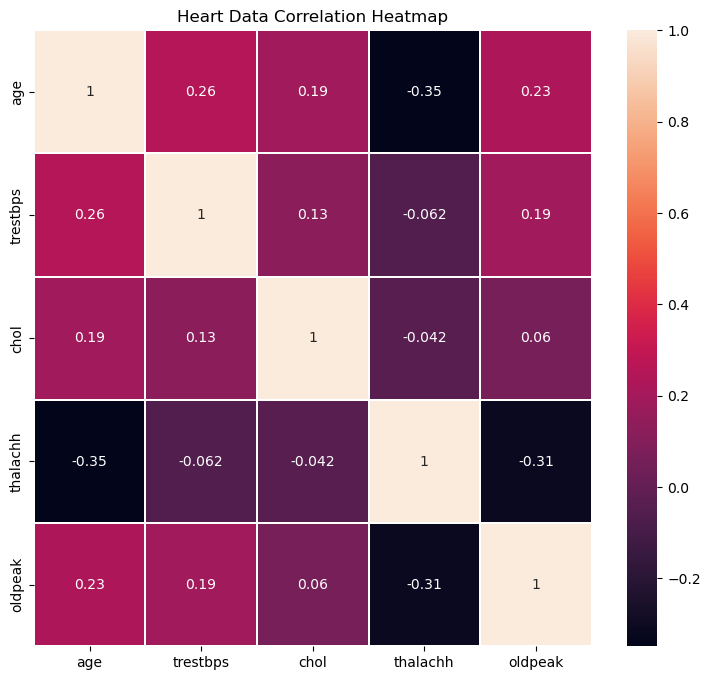

In [26]:
# Correlation Heatmap
plt.figure(figsize = (9,8))
plt.title("Heart Data Correlation Heatmap")
sns.heatmap(df[numerical].corr(), annot = True, linewidths = .1);

The correlation between numerical features seems to be quite low or moderate, even though the variable `thalachh` might need to be checked better.

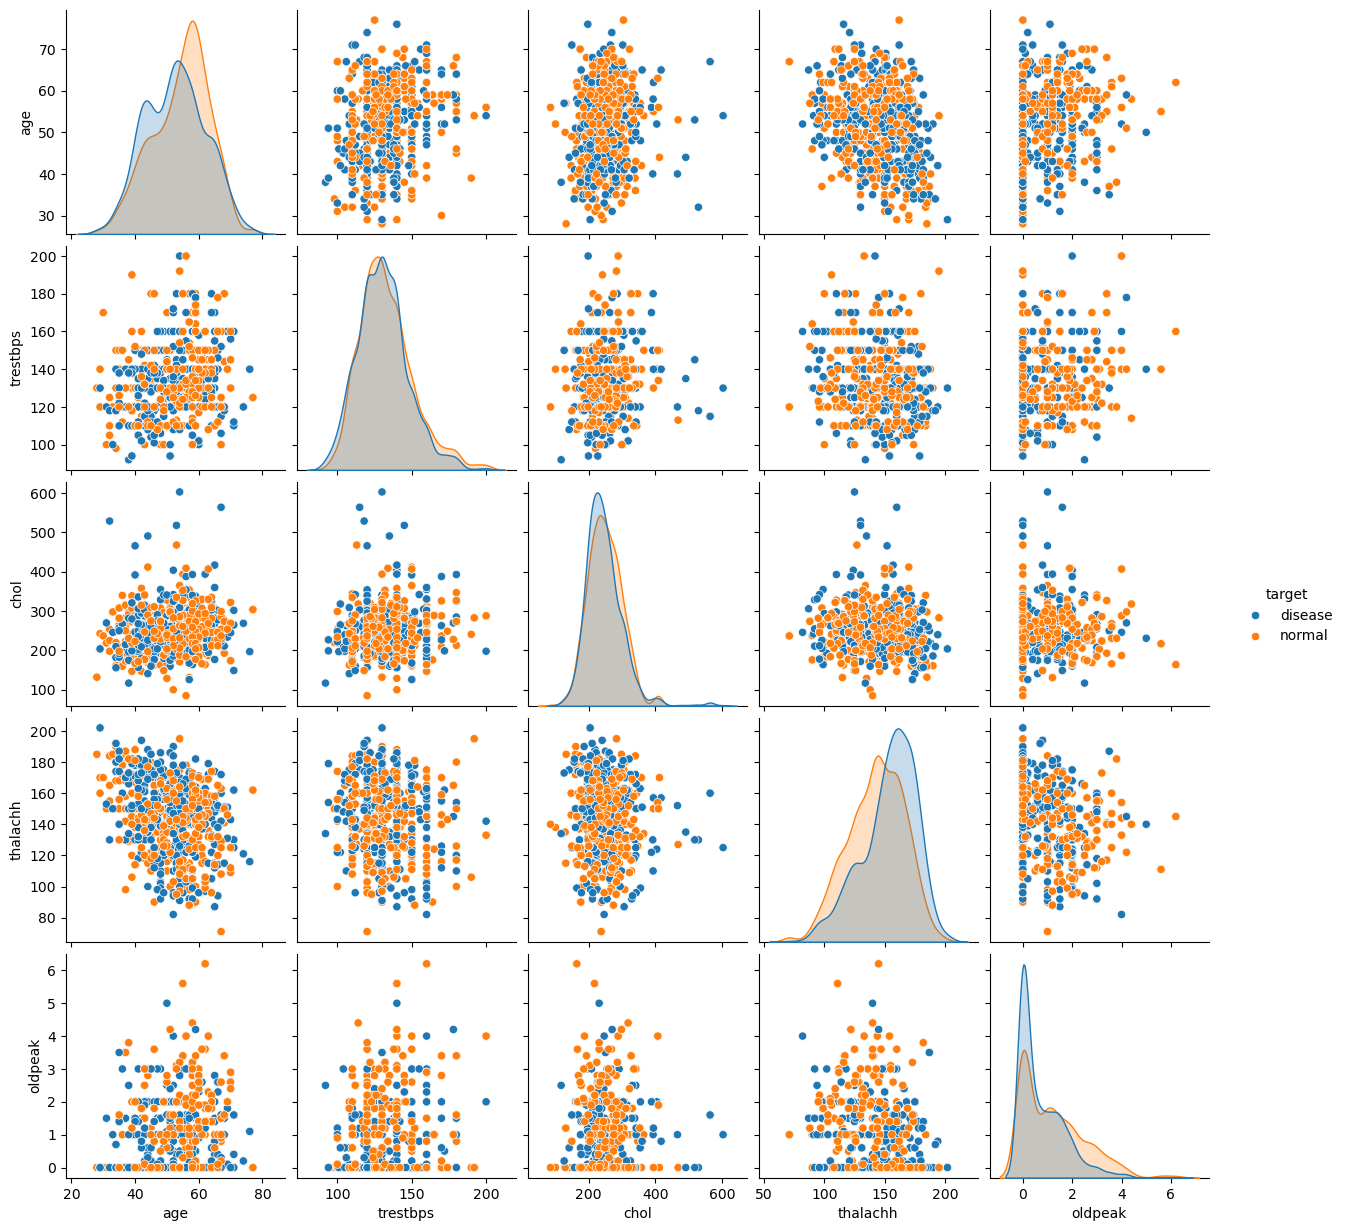

In [27]:
# Pairplot for numerical variables
sns.pairplot(df, hue = "target");

The pairplot doesn't show problematic relationships between numerical features. Even the variable `thalachh` doesn't have clear patterns with others. This indicate that we do not have to worry about multicollinearity.

## Data distribution

### Numerical features

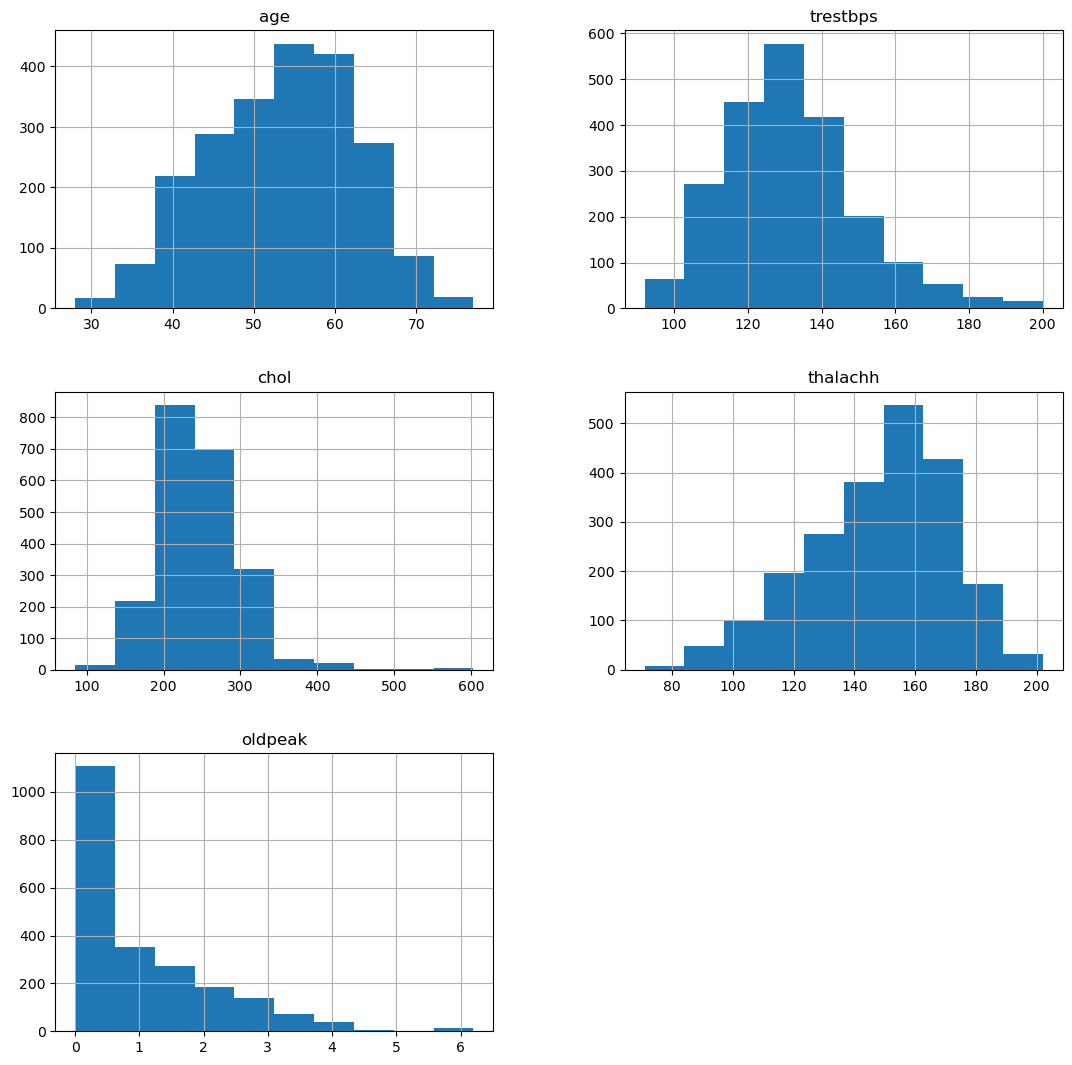

In [28]:
# Histograms of numerical variables
df.hist(figsize = (13, 13));

While the `age` variable follows a normal distribution, all the others are skewed. That means for replacing missing values if we do so, it would be better to use medians.

### Target Variable

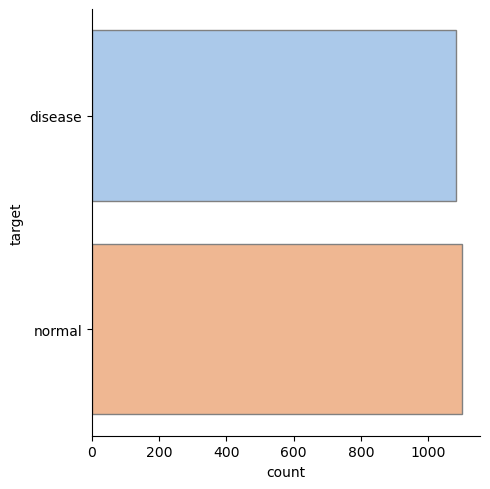

In [29]:
# Target variable distribution
sns.catplot(df, y = "target", kind = "count", hue = "target", palette = "pastel", edgecolor = ".5");

The distribution of data for the target variable is well balanced.

## Handling missing values

In [30]:
# Percentages of missing values
round(100 * df.isnull().sum() / len(df), 2)

age          0.00
sex          0.00
cp          11.55
trestbps     0.05
chol         1.05
fbs          0.37
restecg      0.05
thalachh     0.05
exang        0.05
oldpeak      0.00
slope        9.58
ca          14.63
thal        19.07
target       0.00
dtype: float64

There are some variables with very low percentages of missing values such as `trestbps`, `chol`, `fbs`, `restecg`, `thalachh` and `exang`. We can start by replacing those missing values by medians for numerical variables and by modes for categorical variables. Replacing values first allows to keep information from all observations of the original data set, in  case we delete some data later.

In [31]:
# Replacing numerical missing values by median
df.fillna(value = df[["trestbps", "chol", "thalachh"]].median(), inplace = True)

# Replacing categorical missing values by mode
df["fbs"] = df["fbs"].fillna(value = df["fbs"].mode()[0])
df["restecg"] = df["restecg"].fillna(value = df["restecg"].mode()[0])
df["exang"] = df["exang"].fillna(value = df["exang"].mode()[0])

Now that, some missing values have been replaced, let's handle the variables with more missing values. We guess that some observations may have many missing values in different columns. As we cannot simply replace them, because it might affect the data distribution too much, we will check the observations that have missing values for at least two columns, and delete them.

In [32]:
# List of columns with missing values
missing_features = ["cp", "slope", "ca", "thal"]

# For each variale
for first_miss in missing_features:
    # Check another variable
    for second_miss in missing_features:
        # Make sure those variables are different
        if first_miss != second_miss:
            # Get index of observations to drop
            index_to_drop = (df[(df[first_miss].isnull()) 
                             & (df[second_miss].isnull())].index)
            # Drop missing data
            df.drop(index_to_drop, axis = 'index', inplace = True)

# Percentages of missing values
round(100 * df.isnull().sum() / len(df), 2)

age         0.00
sex         0.00
cp          2.71
trestbps    0.00
chol        0.00
fbs         0.00
restecg     0.00
thalachh    0.00
exang       0.00
oldpeak     0.00
slope       0.28
ca          1.66
thal        2.60
target      0.00
dtype: float64

After this operation, the percentages of missing values has considerably dropped. Now we can simply replace the remaining missing values.

In [33]:
# Replacing categorical missing values by mode
df["cp"] = df["cp"].fillna(value = df["cp"].mode()[0])
df["slope"] = df["slope"].fillna(value = df["slope"].mode()[0])
df["ca"] = df["ca"].fillna(value = df["ca"].mode()[0])
df["thal"] = df["thal"].fillna(value = df["thal"].mode()[0])

Now, let's check the count of missing values in the dataset:

In [34]:
# Count of missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no more missing values in our dataset.

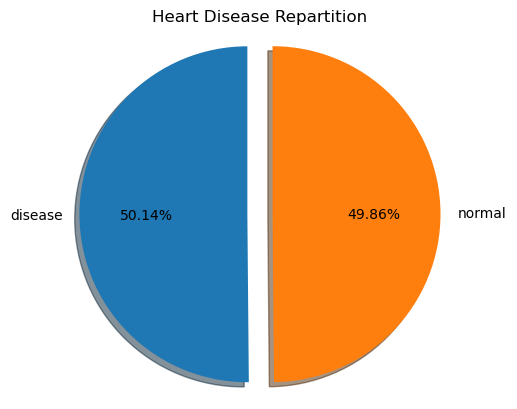

In [35]:
# Labels
labs_names = ['disease','normal']
# Target value counts
data_counts = list(df["target"].value_counts())
# Space between pies
pie_space = (0.15, 0)
# Title
plt.title('Heart Disease Repartition')
# Target variable distribution Pie chart
plt.pie(data_counts, explode = pie_space, labels = labs_names , autopct = '%1.2f%%',
        startangle = 90, shadow = True)
# Put title and plot on same axis
plt.axis('equal');

The dataset is still well balanced after data cleaning. This means we can use `accuracy score` as metric to evaluate our models.

## Target Variable encoding

Before splitting the data, let's encode the target variable:

In [36]:
# Target encoding
df["target"] = (df["target"] == "disease").astype(int)

## Data Splitting into Train - Validation - Test

We will split the data into Train/validation/test sets with 60%/20%/20% distribution using Scikit-Learn (`train_test_split` function) with a seed of `42`:

In [37]:
# Splitting into full train and test
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

# Splitting into train and test
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

In [38]:
# Check datasets sizes after splitting
len(df_train), len(df_val), len(df_test)

(1083, 361, 361)

In [39]:
# Reset indexes
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

Let's extract the target variable `y` from our dataframes:

In [40]:
# Get the target values
y_train = df_train.target.values
y_test = df_test.target.values
y_val = df_val.target.values

# Drop `target` from our data sets
del df_train["target"]
del df_test["target"]
del df_val["target"]

## Feature Importance Analysis

To evaluate feature importance, we can use the **mutual information score** for categorical variables, and the **pearson correlation** for numerical ones.

### Mutual Information

We calculate the mutual information scores (rounded to 5 decimals) between `y` and other categorical variables in the dataset, using the full train data set. We will define a function to ease the process.

In [41]:
# Function to get mutual information sore with respect to the churn
def mutual_info_y_score(series):
    """
    This function takes a series and returns the mutual information score
    with respect to the `y` variable of the full train data set.
    """
    return round(mutual_info_score(series, df_full_train.target), 5)

Now, we can apply this function to the categorical variables:

In [42]:
# Apply mutual information columnwise to categorical variables
mi_scores = df_full_train[categorical].apply(mutual_info_y_score)

# Sourt scores in ascending order
mi_scores.sort_values(ascending = False)

thal       0.14003
cp         0.10439
ca         0.08378
slope      0.08083
exang      0.06419
restecg    0.02542
sex        0.01781
fbs        0.00013
dtype: float64

The most important categorical variable is the thalassemia type (`thal`), and the least one is the fasting blood sugar (`fbs`).

### Pearson Correlation

We calculate the mutual information scores (rounded to 2 decimals) between `y` and numerical variables in the dataset, using the full train data set:

In [43]:
# Absolute correlations between numerical columns and target
df_full_train[numerical].corrwith(df_full_train.target).abs().sort_values(ascending = False)

oldpeak     0.362495
thalachh    0.331442
age         0.168646
chol        0.096872
trestbps    0.095350
dtype: float64

The most important numerical variabe is the ST depression induced by exercise relative to rest (`oldpeak`), and the least one is the resting bood pressure (`trestbps`).

## One-hot Encoding

Before training Machine Learning models, as they only understand numbers, we will encode all categorical variables in our datasets with `One-Hot-Encoding`. For this purpose, we will use `Scikit-Learn` vectorizer: `DictVectorizer`.

In [44]:
# Convert training set to list of dictionaries
train_dicts = df_train.to_dict(orient = 'records')

# Initialize One-Hot-Encoder (vectorizer)
One_Hot_encoder = DictVectorizer(sparse = False) # sparse when there are many categorical variables ---> most of them are 0s
# One-Hot-Encoder training and train data encoding
X_train = One_Hot_encoder.fit_transform(train_dicts)

In [45]:
# Convert validation set to list of dictionaries
val_dicts = df_val.to_dict(orient = 'records')

# Validation data One-Hot-Encoding
X_val = One_Hot_encoder.transform(val_dicts)

In [46]:
# Convert test set to list of dictionaries
test_dicts = df_test.to_dict(orient = 'records')

# Test data One-Hot-Encoding
X_test = One_Hot_encoder.transform(test_dicts)

In [47]:
# Check the features
One_Hot_encoder.get_feature_names_out()

array(['age', 'ca=no_vessel', 'ca=one_vessel', 'ca=three_vessels',
       'ca=two_vessels', 'chol', 'cp=asymptomatic', 'cp=atypical_angina',
       'cp=non_anginal_pain', 'cp=typical_angina', 'exang=no',
       'exang=yes', 'fbs=high_fbs', 'fbs=low_fbs', 'oldpeak',
       'restecg=left_ventricular_hypertrophy', 'restecg=normal',
       'restecg=st_t_wave_abnormality', 'sex=female', 'sex=male',
       'slope=downsloping', 'slope=flat', 'slope=upsloping',
       'thal=fixed_defect', 'thal=normal', 'thal=reversible_defect',
       'thalachh', 'trestbps'], dtype=object)

# Models Training and Fine Tuning

Our goal is to determine the risk or probability of heart disease, using patient data in order to know if the patient is actually sick or not. This problem is a classification problem with patient information as features and health status as outcome.

To accurately classify data, we will fine tune logistic regression models, decision trees, random forest classifiers and gradient boosting classifiers, and select the best model for our user case.

## Logistic Regression

We will fine tune our logistic regression model on all the features by searching the best regularization parameter `C` among the list: `[0.01, 0.1, 1, 10, 100]`. The accuracy will be calculated on the validation dataset and rounded to 3 decimal digits.

In [48]:
# Parameter list
reg_params = [0.01, 0.1, 1, 2, 10, 100]

# Initialize scores
reg_params_scores = []

# Parameter Fine-Tuning
for param in reg_params:
    # Define the model
    model = LogisticRegression(solver = 'liblinear', C = param,
                               max_iter = 1000, random_state = 42)
    # Model fitting
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_val)    
    # Accuracy score
    param_score = 100 * (y_pred == y_val).mean()

    # Append rounded score
    reg_params_scores += [round(param_score, 2)]

# Series for parameters scores
param_scores = pd.Series(reg_params_scores, index = reg_params, name = "parameters_scores")
param_scores

0.01      77.56
0.10      79.78
1.00      80.61
2.00      80.89
10.00     80.89
100.00    80.89
Name: parameters_scores, dtype: float64

The best value for the regularization parameter is `2` leading to a `logistic regression model` with an accuracy of $80.89 \%$.

## Decision Tree Classifier

As parameters for a decision tree, `max_depth` and `min_samples_leaf` have a greater importance than the others. The first  limits the tree's complexity, preventing it from growing too deep and memorizing the training data. The second ensures that leaf nodes have a sufficient number of samples, reducing the chance of creating nodes that are too specific to the training data. That's why we will focus on fine tuning only these two parameters.

First, we will fine tune the `max_depth`, to get a subset of depths values that we will combine with `min_samples_leaf` for another fine-tuning.

<p style = "color:brown">Reminder:</p>
The depth of a tree is the length of the longest path from the root node to a leaf node (terminal node, at the last level pf a tree).

In [49]:
# List of potential maximum depths
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, 25, None]

# Decision Tree model fine-tuning with maximum depth
for depth in depths: 
    # Initialize the model with a max_depth
    dt = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    # Model Training
    dt.fit(X_train, y_train)

    # Make predictions
    y_pred = dt.predict(X_val)
    # accuracy score
    acc = 100 * (y_pred == y_val).mean()
    
    print('Maximum depth: %4s -> Accuracy score: %.3f' % (depth, acc))

Maximum depth:    1 -> Accuracy score: 69.806
Maximum depth:    2 -> Accuracy score: 69.806
Maximum depth:    3 -> Accuracy score: 76.177
Maximum depth:    4 -> Accuracy score: 78.116
Maximum depth:    5 -> Accuracy score: 83.657
Maximum depth:    6 -> Accuracy score: 86.150
Maximum depth:   10 -> Accuracy score: 95.568
Maximum depth:   15 -> Accuracy score: 96.953
Maximum depth:   20 -> Accuracy score: 96.953
Maximum depth:   25 -> Accuracy score: 96.953
Maximum depth: None -> Accuracy score: 96.953


According to this model fine-tuning, the best parameter for the tree's maximum depth is between 10 and 20. We can now proceed to another fine-tuning considering those values.

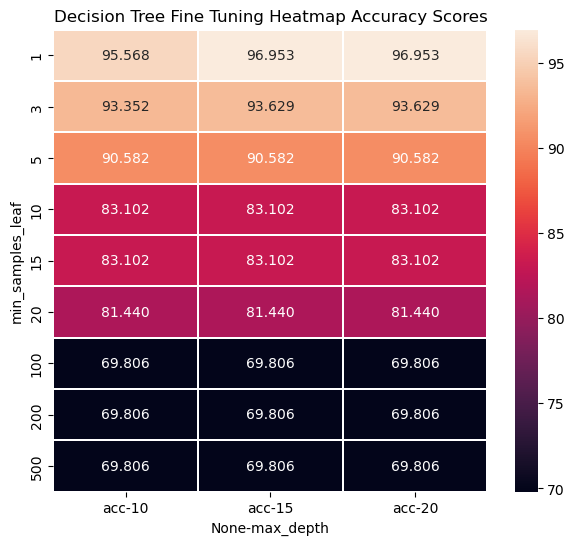

In [50]:
# Initialize scores
scores = []

# Decision Tree fine-tuning with maximum-depth
for depth in [10, 15, 20]:
    # Decision Tree model fine-tuning with minimum samples per leaf
    for s in [1, 3, 5, 10, 15, 20, 100, 200, 500]:
        # Initialize the model with a max_depth and min_samples_leaf
        dt = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = s, random_state = 42)
        # Model training
        dt.fit(X_train, y_train)

        # Make predictions
        y_pred = dt.predict(X_val)
        # accuracy score
        acc = 100 * (y_pred == y_val).mean()

        # Store parameters and score
        scores.append((depth, s, acc))

# Columns names
columns = ['max_depth', 'min_samples_leaf', 'acc']
# Create dataframe
df_scores = pd.DataFrame(scores, columns = columns)

# Pivot table
df_scores_pivot = df_scores.pivot(index = 'min_samples_leaf', columns = ['max_depth'], values = ['acc'])

# Scores Heatmap
plt.figure(figsize=(7, 6))
plt.title("Decision Tree Fine Tuning Heatmap Accuracy Scores")
sns.heatmap(df_scores_pivot, annot = True, fmt = ".3f", linewidths = .1);

**Heatmaps** are useful to visualize lower and higher numerical values faster, and in this particular case, it helps to identify the best parameters: `15` for the `max_depth` and `1` for the `min_samples_leaf`. The optimal decision tree gives an accuracy of $96.96\%$.

## Random Forest Classifier

A **Random Forest** is a type of **ensemble learning** (approach using multiple models said weak learners to make predictions) that combines multiple decision trees. Each tree is trained on a different random subset of features, preventing all trees from being identical. 

<p style = "color:green">Remark:</p>

For fine-tuning this model, we will focus on the number of trees (`n_estimators`) and the most important parameters for a decision tree: its maximum depth (`max_depth`) and its minimum number of leaves (`min_samples_leaf`). First, we will fine tune the number of trees and their depth together, so to determine the optimal depth and later, fine-tune the number of trees and their minimum number of leaves.

In [51]:
# Initialize scores
scores = []

# Possible number of estimators
n_params = np.arange(10, 201, 10)

# Random forest fine-tuning with maximum depth
for d in [5, 10, 15, 20, 25]:
    # Random forest fine-tuning with number of trees
    for n in n_params:
        # Initialize random forest classifier
        rf = RandomForestClassifier(n_estimators = n,
                                    max_depth = d,
                                    random_state = 42,
                                    n_jobs = -1)
        # Model training
        rf.fit(X_train, y_train)

        # Make predictions
        y_pred = rf.predict(X_val)
        # accuracy score
        acc = 100 * (y_pred == y_val).mean()

        # Store hyperparameters and corresponding score
        scores.append((d, n, acc))

# Columns names
columns = ['max_depth', 'n_estimators', 'acc']
# Create a dataframe for scores
df_scores = pd.DataFrame(scores, columns = columns)
# Let's get the rounded mean accuracy for each depth
df_scores.groupby("max_depth")["acc"].mean().round(3)

max_depth
5     85.789
10    97.992
15    97.729
20    97.742
25    97.742
Name: acc, dtype: float64

The optimal value for `max_depth` is `10`. We can now fine tune the number of trees and the minimum sample leaves.

In [52]:
# Set the maximum depth
max_depth = 10

In [53]:
# Initialize scores
scores = []

# Values for min_samples_leaf
min_sampl = [1, 3, 5, 10, 50]

# Fine-tunining with minimum samples per leaf
for s in min_sampl:
    # Fine-tuning with number of estimators
    for n in n_params:
        # Initialize model
        rf = RandomForestClassifier(n_estimators = n,
                                    max_depth = 10,
                                    min_samples_leaf = s,
                                    random_state = 42,
                                    n_jobs = -1)
        # Model training
        rf.fit(X_train, y_train)

        # Make predictions
        y_pred = rf.predict(X_val)
        # accuracy score
        acc = 100 * (y_pred == y_val).mean()

        # Store hyperparameters and score
        scores.append((s, n, acc))

# Column names
columns = ['min_samples_leaf', 'n_estimators', 'acc']
# Create dataframe for scores
df_scores = pd.DataFrame(scores, columns = columns)
df_scores.sort_values(by = ["acc", "n_estimators"], ascending = [False, True]).head(3)

,min_samples_leaf,n_estimators,acc
3,1,40,98.060942
4,1,50,98.060942
6,1,70,98.060942


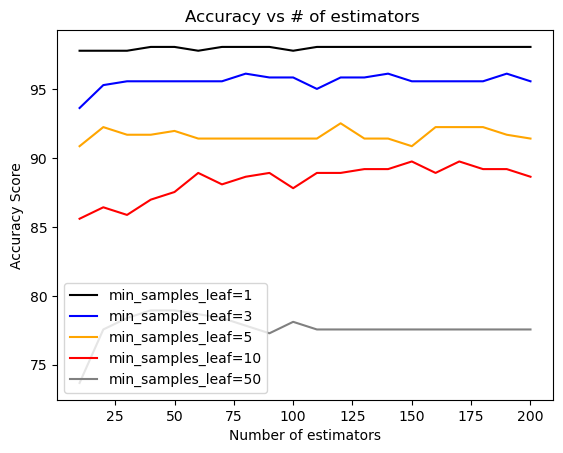

In [54]:
# Colors sets
colors = ['black', 'blue', 'orange', 'red', 'grey']

# For defined minimum samples per leaf
for s, col in zip(min_sampl, colors):
    # Get scores
    df_subset = df_scores[df_scores.min_samples_leaf == s]

    # Plot scores by estimators
    plt.plot(df_subset.n_estimators, df_subset.acc,
             color = col,
             label = 'min_samples_leaf=%d' % s)
    # Labels and title
    plt.xlabel("Number of estimators")
    plt.ylabel("Accuracy Score")
    plt.title("Accuracy vs # of estimators ")
    plt.legend();

The best parameter values for our random forest are `10` for the maximum depth of trees (`max_depth`), `1` for the minimum sample leaves (`min_samples_leaf`) and `40` for the number of estimators (`n_estimators`). Note as many values for `n_estimators` lead to the best accuracy score, we chose the smallest number of trees, that will make our model less computationally expensive.

This parameters, allows our random forest model to achieve an accurarcy score of $98.06 \%$.

## XGBoost Classifier

The **Gradient Boosting classifier** trains trees sequentially to correct previous errors. To fine tune this model, we will more focus on its learning parameter `eta`, using previous information obtained for optimal maximum depth of trees (`15` first, and then `10`) and for minimum sample leaves (`1`), and default values for the other parameters.

We update train and validation sets to get the `DMatrix` format that works best with `xgboost`, and create a watchlist to traceback scores during model training. 

In [55]:
# Feature variables
features = list(One_Hot_encoder.get_feature_names_out())
# Wrap the training data into an optimized structure
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names = features)
# Wrap the validation data into an optimized structure
dval = xgb.DMatrix(X_val, label = y_val, feature_names = features)

# Dataset on which we want to iterate our model
watchlist = [(dtrain, 'train'), (dval, 'val')]

With a maximum depth of `15`: 

In [56]:
# List of learning rates parameters
eta_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# XgBoost fine-tuning with learning rates
for eta_par in eta_values:
    # Model's parameters
    xgb_params = {
        'eta': eta_par, 
        'max_depth': 15,
        'min_child_weight': 1,
        'objective': 'binary:logistic',
        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }
    
    # Model training
    model = xgb.train(xgb_params, dtrain, 
                      num_boost_round = 200)
    
    # Make predictions
    y_pred = model.predict(dval) >= 0.5
    
    # Print parameter and accuracy score
    print('eta = %.1f, max_depth = 15, min_child_weight = 1, accuracy = %.3f.' % (xgb_params['eta'], (100 * (y_pred == y_val).mean())))

eta = 0.1, max_depth = 15, min_child_weight = 1, accuracy = 96.953.
eta = 0.3, max_depth = 15, min_child_weight = 1, accuracy = 96.953.
eta = 0.5, max_depth = 15, min_child_weight = 1, accuracy = 96.953.
eta = 0.7, max_depth = 15, min_child_weight = 1, accuracy = 96.399.
eta = 0.9, max_depth = 15, min_child_weight = 1, accuracy = 95.845.


With a maximum depth of `10`: 

In [57]:
# List of learning rates parameters
eta_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# XgBoost fine-tuning with learning rates
for eta_par in eta_values:
    # Model's parameters
    xgb_params = {
        'eta': eta_par, 
        'max_depth': 10,
        'min_child_weight': 1,
        'objective': 'binary:logistic',
        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }
    
    # Model training
    model = xgb.train(xgb_params, dtrain, 
                      num_boost_round = 200)
    
    # Make predictions
    y_pred = model.predict(dval) >= 0.5
    
    # Print parameter and accuracy score
    print('eta = %.1f, max_depth = 10, min_child_weight = 1, accuracy = %.3f.' % (xgb_params['eta'], (100 * (y_pred == y_val).mean())))

eta = 0.1, max_depth = 10, min_child_weight = 1, accuracy = 96.953.
eta = 0.3, max_depth = 10, min_child_weight = 1, accuracy = 96.953.
eta = 0.5, max_depth = 10, min_child_weight = 1, accuracy = 96.676.
eta = 0.7, max_depth = 10, min_child_weight = 1, accuracy = 96.399.
eta = 0.9, max_depth = 10, min_child_weight = 1, accuracy = 95.845.


After fine tuning models, the best XGBoost classifier achieved an accuracy of $96.95\%$ with `1` as value for the minimum sample leaves (`min_samples_leaf`), `10` for the maximum depth of trees (`max_depth`), and `0.3` for the learning parameter (`eta`).

# Model Selection

Th best model after training and fine tuning logistic regression, decision trees, random forest classifiers and Gradient Boost classifiers, is the **random forest model** that achieved an accuracy of $98.06 \%$.

# Model Deployment

We will train our model using the `K-Fold Cross-Validation` to evaluate its **stability**. After that, we will train it again on the full train set, and evaluate it on the test set, for saving it using `pickle`.

Let's first define functions for training the model and evaluating it.

In [58]:
# Function for training a random forest classifier
def train(df_train, y_train, n_estimators = 40, max_depth = 10, min_samples_leaf = 1):
    """
    This function takes in a training data set, and its target variable, with hyperparameters
    of a random forest classifier and train the model, to return the encoder
    and the classifier trained.
    ---
    df_train: Training data set
    y_train: Training target variable
    n_estimators: Number of trees for the random forest classifier,
                    default: 40
    max_depth: Maximum depth of trees for the random forest classifier,
                    default: 10
    min_samples_leaf: Minimum sample leaves for trees of the random forest classifier,
                    default: 1
    """
    # Convert training set to list of dictionaries
    train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')
    
    # Initialize One-Hot-Encoder (vectorizer)
    One_Hot_encoder = DictVectorizer(sparse = False)
    # One-Hot-Encoder training and train data encoding
    X_train = One_Hot_encoder.fit_transform(train_dicts)

    # Initialize random forest model
    rf = RandomForestClassifier(n_estimators = n_estimators,
                                max_depth = max_depth,
                                min_samples_leaf = min_samples_leaf,
                                random_state = 42,
                                n_jobs = -1)
    # Model training
    rf.fit(X_train, y_train)

    # return one-hot-encoder and random forest model
    return One_Hot_encoder, rf


# Function to make predictions with a random forest classifier
def predict(df, One_Hot_encoder, rf):
    """
    This function takes in a dataframe, a One-Hot-Encoder (dict vectorizer), and
    a random forest model already trained in ore=der to make predictions.
    ---
    df: dataframe to evaluate the model
    One_Hot_Encoder: dict vectorixer to encode categorical variables in the test dataframe
    rf: random forest classifier already trained
    """
     # Convert data to list of dictionaries
    dicts = df[categorical + numerical].to_dict(orient = 'records')

    # One-Hot-Encoding
    X = One_Hot_encoder.transform(dicts)
    # Make predictions
    y_pred = rf.predict(X)
    
    # return predictions
    return y_pred

## Cross - Validation Training

Before training our model for the last time, we validate it using the `K-Fold Cross-Validation` method to get a more reliable estimate of its performance, capturing both accuracy's mean and standard deviation.

In [59]:
# Number of splits for Kfold Cross-Validation
n_splits = 5

In [60]:
# Cross Validattion
print(f"Performing KFold Cross-Validation")
# Kfold cross-validation initalization
kfold = KFold(n_splits = n_splits, shuffle = True, random_state = 1)

# Initialize scores
scores = []

# Initialize number of folds
fold = 0

# For each iteration of K-fold split and the pair of indexes generated
for train_idx, val_idx in kfold.split(df_full_train):
    # Select train and validation data
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    # Select target variables
    y_train = df_train.target.values
    y_val = df_val.target.values

    # Train model
    One_Hot_encoder, rf = train(df_train, y_train)
    # Make predictions
    y_pred = predict(df_val, One_Hot_encoder, rf)

    # Get score
    acc = round(100 * (y_pred == y_val).mean(), 2)
    # Store score
    scores.append(acc)
    # print auc
    print(f"Accuracy on fold {fold} is {acc} %.")

    # Increment number of fold
    fold += 1
    
# Print scores' means and standard deviations
print("Validation results:")
print('acc mean = %.2f, acc std = +- %.2f' % (np.mean(scores), np.std(scores)))

Performing KFold Cross-Validation
Accuracy on fold 0 is 97.23 %.
Accuracy on fold 1 is 97.23 %.
Accuracy on fold 2 is 96.54 %.
Accuracy on fold 3 is 97.92 %.
Accuracy on fold 4 is 97.22 %.
Validation results:
acc mean = 97.23, acc std = +- 0.44


The accuracy of our model with `K-Fold Cross-Validation` is only slightly different from the previous one. This is good news, especially as the standard deviation of scores is only of $0.44 \%$ for this achieved accuracy of $97.23 \%$.

## Final Model Training

Let's now train our model on the full training data set, and evaluate it on the test set.

In [61]:
# Optimal parameters values
n_estimators, max_depth, min_samples_leaf = 40, 10, 1
# Optimal random forest model training
One_Hot_encoder, rf = train(df_full_train[categorical + numerical], df_full_train.target,
                            n_estimators = n_estimators, max_depth = max_depth,
                            min_samples_leaf = min_samples_leaf)
# Make predictions
y_pred = predict(df_test, One_Hot_encoder, rf)
# accuracy score
print('Optimal model accuracy = %.2f.' % (100 * (y_pred == y_test).mean()))

Optimal model accuracy = 95.29.


The obtained accuracy is very good and not too far from the validation accuracy obtained earlier.

## Save the model

Let's save our model and the encoder used to a file.

In [62]:
# model file name
output_file = f'rf_model_{n_estimators}_trees_depth_{max_depth}_min_samples_leaf_{min_samples_leaf}.bin'
output_file

'rf_model_40_trees_depth_10_min_samples_leaf_1.bin'

In [63]:
# Open file and write into it
with open(output_file, 'wb') as f_out: 
    # Save model
    print("Storing the model into a file")
    pickle.dump((One_Hot_encoder, rf), f_out)
    
print(f"The model is saved to {output_file}.")

Storing the model into a file
The model is saved to rf_model_40_trees_depth_10_min_samples_leaf_1.bin.


In [64]:
# Check binary files to make sure the model was saved
!ls *bin

rf_model_40_trees_depth_10_min_samples_leaf_1.bin


## Load the model

We now load our model to use it.

In [65]:
# Name of the model
input_file = 'rf_model_40_trees_depth_10_min_samples_leaf_1.bin'

# Open file to read it
with open(input_file, 'rb') as f_in:
    # Load the model
    One_Hot_encoder, rf = pickle.load(f_in)

# output the model
rf

RandomForestClassifier(max_depth=10, n_estimators=40, n_jobs=-1,
                       random_state=42)

## Test the model

We enter random information for a patient in order to test the model prediction.

In [66]:
# Random patient information
patient = {'age': 37,
           'sex': 'male',
           'cp': 'typical_angina',
           'trestbps': 137.0,
           'chol': 193.0,
           'fbs': 'low_fbs',
           'restecg': 'st_t_wave_abnormality',
           'thalachh': 112.0,
           'exang': 'no',
           'oldpeak': 3.7,
           'slope': 'downsloping',
           'ca': 'no_vessel',
           'thal': 'fixed_defect'}

In [67]:
# Format input data
X_i = pd.DataFrame([patient])
# Make predictions
y_i_pred = predict(X_i, One_Hot_encoder, rf)

# Print customer info and the model's prediction
print('input data:')
display(X_i)
print('output information:', y_i_pred)
# Define a treatment if necessary
if y_i_pred[0]:
    print('Define a treatment for the patient-test.')

input data:


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal
0,37,male,typical_angina,137.0,193.0,low_fbs,st_t_wave_abnormality,112.0,no,3.7,downsloping,no_vessel,fixed_defect


output information: [1]
Define a treatment for the patient-test.


---